In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sqlite3
import pandas as pd
import sqlite3

import os
from dotenv import load_dotenv
from utils.get_or_create_combined_database import get_or_create_combined_database
load_dotenv(verbose=True, override=True)

database_folder = os.getenv("DATABASE_FOLDER")

database_file = get_or_create_combined_database(database_folder)

table_name = "champs_cleaned"

conn = sqlite3.connect(database_file)
query = 'SELECT * FROM champs_cleaned'
data = pd.read_sql_query(query, conn)
conn.close()

# Display the first few rows of the dataframe
data.head()

Found 101 database files in the folder specified by DATABASE_FOLDER
Found combined database D:\league-ezreal-dataset\ml_project\combined2.db


,game_id,time,name,hp,max_hp,mana,max_mana,armor,mr,ad,...,d_name,d_cd,f_name,f_cd,normalized_pos_x,normalized_pos_z,normalized_time,normalized_hp,normalized_name,compound_key
0,4848459903,5.028642,KSante,570.0,570.0,290.0,290.0,57.0,30.0,64.0,...,SummonerFlash,10.971358,SummonerTeleport,10.971358,0.040267,0.040800,0.002794,0.114,897,4848459903_100_KSante
1,4848459903,5.028642,Ekko,655.0,655.0,280.0,280.0,44.0,32.0,58.0,...,SummonerFlash,10.971358,SummonerSmite,10.971358,0.044267,0.019067,0.002794,0.131,245,4848459903_100_Ekko
2,4848459903,5.028642,Swain,610.0,610.0,468.0,468.0,26.0,46.0,58.0,...,SummonerFlash,10.971358,SummonerHaste,10.971358,0.024267,0.009067,0.002794,0.122,50,4848459903_100_Swain
3,4848459903,5.028642,Ezreal,600.0,600.0,375.0,375.0,36.0,30.0,67.4,...,SummonerHaste,10.971358,SummonerFlash,10.971358,0.008800,0.026800,0.002794,0.120,81,4848459903_100_Ezreal
4,4848459903,5.028642,Rumble,650.0,650.0,0.0,150.0,48.0,28.0,61.0,...,SummonerDot,10.971358,SummonerFlash,10.971358,0.019867,0.045067,0.002794,0.130,68,4848459903_100_Rumble


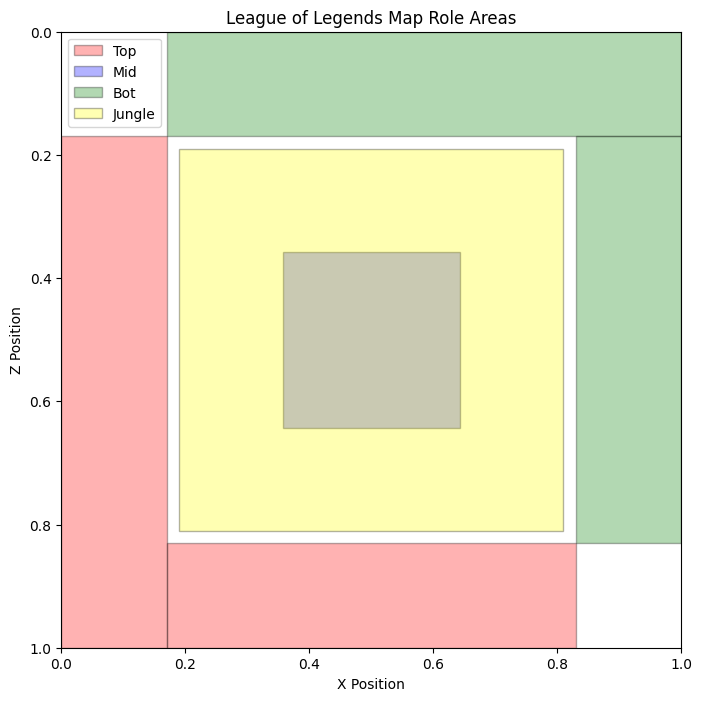

In [2]:
lane_width = 0.17
lw = lane_width
jungle_padding = 0.02
jp = jungle_padding
mid_multiplier = 2.1
mmulti = mid_multiplier


top_ranges = [[(0, lw), (lw, 1)], [(lw, 1-lw), (1-lw, 1)]]
mid_range = [(1 - mmulti * lw, 1 - mmulti * lw), (mmulti * lw, mmulti*lw,)]
bot_ranges = [[(lw, 0), (1, lw), ], [(1-lw, lw), (1, 1-lw), ]]
jungle_range = [(lw+jp, lw+jp), (1-lw-jp, 1-lw-jp)]

# Function to plot the role areas with dynamic ranges


def plot_dynamic_role_areas():
    fig, ax = plt.subplots(figsize=(8, 8))

    # Define the areas for each role with dynamic ranges
    for top_range in top_ranges:
        top_area = patches.Rectangle(top_range[0], top_range[1][0]-top_range[0][0], top_range[1][1]-top_range[0][1],
                                     facecolor='red', alpha=0.3, edgecolor='black', label='Top')
        ax.add_patch(top_area)

    mid_area = patches.Rectangle(mid_range[0], mid_range[1][0]-mid_range[0][0], mid_range[1][1]-mid_range[0][1],
                                 facecolor='blue', alpha=0.3, edgecolor='black', label='Mid')
    ax.add_patch(mid_area)

    for bot_range in bot_ranges:
        bot_area = patches.Rectangle(bot_range[0], bot_range[1][0]-bot_range[0][0], bot_range[1][1]-bot_range[0][1],
                                     facecolor='green', alpha=0.3, edgecolor='black', label='Bot')
        ax.add_patch(bot_area)

    jungle_area = patches.Rectangle(jungle_range[0], jungle_range[1][0]-jungle_range[0][0], jungle_range[1][1]-jungle_range[0][1],
                                    facecolor='yellow', alpha=0.3, edgecolor='black', label='Jungle')
    ax.add_patch(jungle_area)

    # Set plot limits and labels
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('X Position')
    ax.set_ylabel('Z Position')
    ax.set_title('League of Legends Map Role Areas')

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys())

    # Show the plot
    plt.gca().invert_yaxis()  # Invert y axis to match typical map orientation
    plt.show()


plot_dynamic_role_areas()

In [3]:
import matplotlib.pyplot as plt

# Plot positions of a single champion


def plot_champion_positions(data, champion_names):
    plt.figure(figsize=(8, 8))
    for champion_name in champion_names:
        champion_data = data[data['name'] ==
                             champion_name][data['time'] > 2 * 60][data['time'] < 2.2 * 60]
        plt.scatter(champion_data['pos_x'],
                    champion_data['pos_z'], alpha=0.5, label=champion_name)

    # Define the areas for each role with dynamic ranges
    for top_range in top_ranges:
        top_area = patches.Rectangle(top_range[0], top_range[1][0]-top_range[0][0], top_range[1][1]-top_range[0][1],
                                     facecolor='red', alpha=0.3, edgecolor='black', label='Top')
        plt.gca().add_patch(top_area)

    mid_area = patches.Rectangle(mid_range[0], mid_range[1][0]-mid_range[0][0], mid_range[1][1]-mid_range[0][1],
                                 facecolor='blue', alpha=0.3, edgecolor='black', label='Mid')
    plt.gca().add_patch(mid_area)

    for bot_range in bot_ranges:
        bot_area = patches.Rectangle(bot_range[0], bot_range[1][0]-bot_range[0][0], bot_range[1][1]-bot_range[0][1],
                                     facecolor='green', alpha=0.3, edgecolor='black', label='Bot')
        plt.gca().add_patch(bot_area)

    jungle_area = patches.Rectangle(jungle_range[0], jungle_range[1][0]-jungle_range[0][0], jungle_range[1][1]-jungle_range[0][1],
                                    facecolor='yellow', alpha=0.3, edgecolor='black', label='Jungle')
    plt.gca().add_patch(jungle_area)

    # Set plot limits and labels
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Positions of Champions')
    plt.gca().invert_yaxis()  # Invert y axis to match typical map orientation
    plt.legend()
    plt.show()

# Example usage with a single champion
# champion_names = data['name'].unique()
# plot_champion_positions(data, champion_names)  # Replace 'Irelia' with the actual champion name in your dataset

In [4]:
def is_within_range(player_data, range_):
    x_min, x_max = sorted([range_[0][0], range_[1][0]])
    z_min, z_max = sorted([range_[0][1], range_[1][1]])
    return np.sum((player_data['pos_x'] > x_min) &
                  (player_data['pos_x'] < x_max) &
                  (player_data['pos_z'] > z_min) &
                  (player_data['pos_z'] < z_max))

# Function to assign roles to each player with dynamic ranges


def assign_roles_single_game(data):
    roles = {}
    teams = data['team'].unique()

    for team in teams:
        team_data = data[data['team'] == team]
        players = team_data['name'].unique()

        # Calculate metrics to infer roles
        time_in_jungle = {}
        time_in_mid = {}
        time_in_bot = {}
        time_in_top = {}

        for player in players:
            player_data = team_data[team_data['name'] == player]
            time_in_jungle[player] = is_within_range(
                player_data, jungle_range) - is_within_range(player_data, mid_range)
            time_in_mid[player] = is_within_range(player_data, mid_range)
            time_in_bot[player] = sum(is_within_range(
                player_data, bot_range) for bot_range in bot_ranges)
            time_in_top[player] = sum(is_within_range(
                player_data, top_range) for top_range in top_ranges)

        # Identify the jungler
        jungler = max(time_in_jungle, key=time_in_jungle.get)
        roles[jungler] = 'Jungle'
        players = [p for p in players if p != jungler]

        # Identify the mid
        mid = max(time_in_mid, key=time_in_mid.get)
        roles[mid] = 'Mid'
        players = [p for p in players if p != mid]

        # Identify the bot roles
        bot1, bot2 = sorted(
            players, key=lambda p: time_in_bot[p], reverse=True)[:2]
        roles[bot1] = 'Bot'
        roles[bot2] = 'Bot'
        players = [p for p in players if p not in [bot1, bot2]]

        # The remaining player is the top
        roles[players[0]] = 'Top'

    return roles


# Group data by game_id and assign roles for each game
all_roles = {}
for game_id, game_data in data.groupby('game_id'):
    roles = assign_roles_single_game(game_data)
    all_roles.update(roles)

# Replace champion names with their roles in the data
data['role'] = data['name'].map(all_roles)

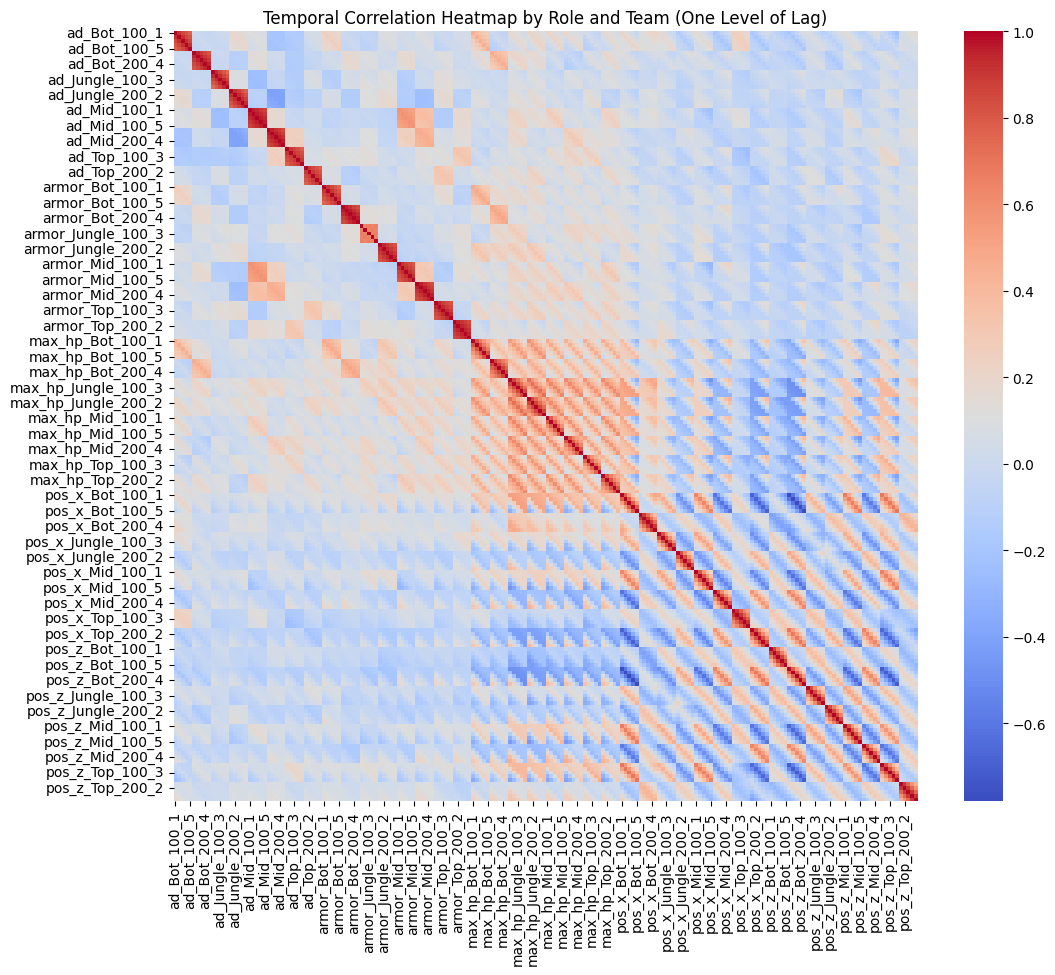

In [61]:
# Pivot the data so that each row contains values for all players at each timestamp, using roles and teams
pivot_columns = ['pos_z', 'armor', 'max_hp', 'ad', 'pos_x']
pivoted_data = data.pivot_table(
    index=['game_id', 'time'], columns=['role', 'team'], values=pivot_columns)

# Flatten the MultiIndex columns
pivoted_data.columns = ['_'.join([str(v) for v in col]).strip()
                        for col in pivoted_data.columns.values]
pivoted_data.reset_index(inplace=True)

# Parameters for sliding windows with one level of lag
H = 5  # Window size (number of steps)
step_size = 20  # Step size (time steps apart)

# Function to create sliding windows


def create_sliding_windows(data, window_size, step_size):
    data_windows = []
    for i in range(window_size * step_size, len(data), step_size):
        window = data.iloc[i-window_size *
                           step_size:i:step_size].reset_index(drop=True)
        if len(window) == window_size:
            data_windows.append(window.values.flatten())
    columns_expanded = [f'{col}_{j}' for j in range(
        1, window_size+1) for col in data.columns]
    return pd.DataFrame(data_windows, columns=columns_expanded)


# Create sliding windows for the pivoted data
sliding_windows_data_lag = create_sliding_windows(pivoted_data, H, step_size)

# Sorting function


def sort_columns_properly(columns):
    def sort_key(col):
        for feature in pivot_columns:
            if feature in col:
                col = col.replace(feature, '')
                role = col.split('_')[1]
                team = col.split('_')[2]
                lag = col.split('_')[-1]
                return '_'.join([feature, role, team, lag])
        return '_'

    return sorted(columns, key=sort_key)


# Sorting the columns properly for the sliding windows data
sorted_columns_properly = sort_columns_properly(
    sliding_windows_data_lag.columns)
sliding_windows_data_lag_sorted = sliding_windows_data_lag[sorted_columns_properly]

# Function to reshape the sliding windows data for correlation analysis


def reshape_sliding_windows(sliding_windows_data, window_size):
    reshaped_data = {}
    for col in sliding_windows_data.columns:
        if 'game' in col or 'time' in col:
            continue

        reshaped_data[col] = sliding_windows_data[col]
    return pd.DataFrame(reshaped_data)


# Reshape the sliding windows data for correlation analysis
reshaped_data_lag_sorted = reshape_sliding_windows(
    sliding_windows_data_lag_sorted, H)

# Compute the correlation matrix
correlation_matrix_lag_sorted = reshaped_data_lag_sorted.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_lag_sorted, annot=False, cmap='coolwarm')
plt.title('Temporal Correlation Heatmap by Role and Team (One Level of Lag)')
plt.show()

C:\Users\juppi\AppData\Local\Temp\ipykernel_20048\1923373675.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(axis=0, inplace=True)


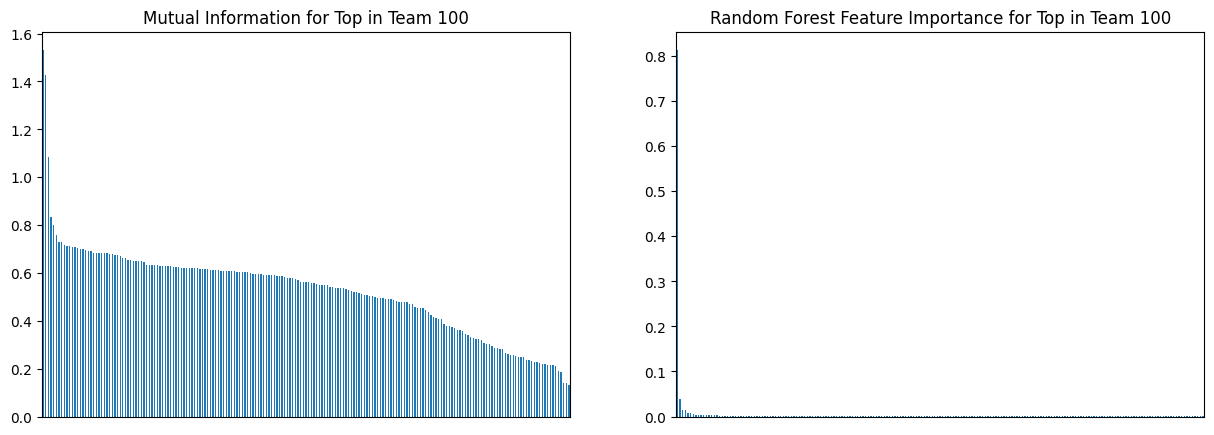

C:\Users\juppi\AppData\Local\Temp\ipykernel_20048\1923373675.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(axis=0, inplace=True)


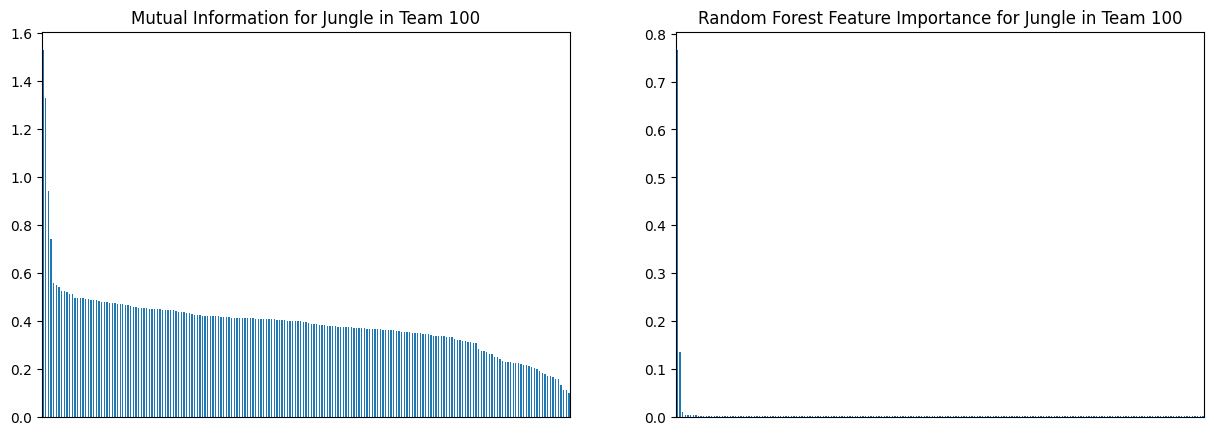

C:\Users\juppi\AppData\Local\Temp\ipykernel_20048\1923373675.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(axis=0, inplace=True)


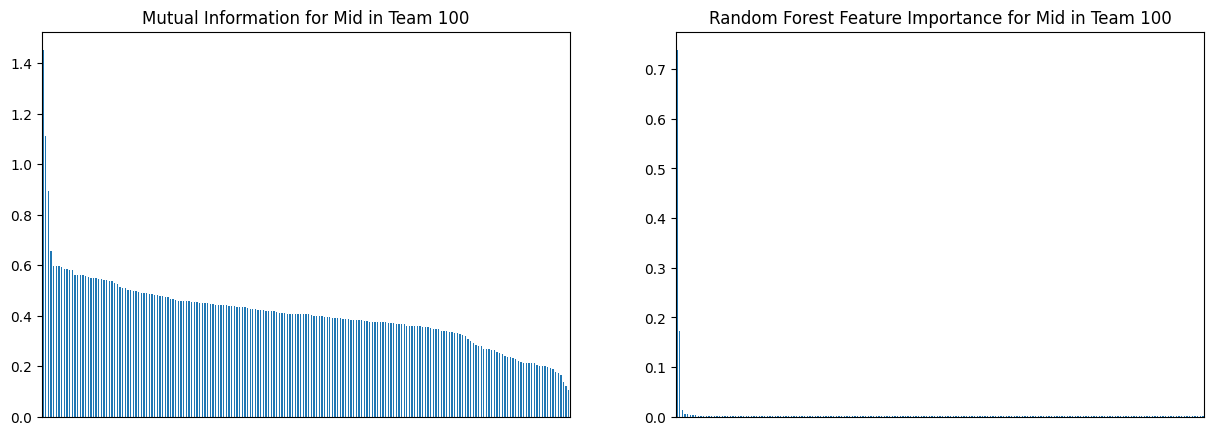

C:\Users\juppi\AppData\Local\Temp\ipykernel_20048\1923373675.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(axis=0, inplace=True)


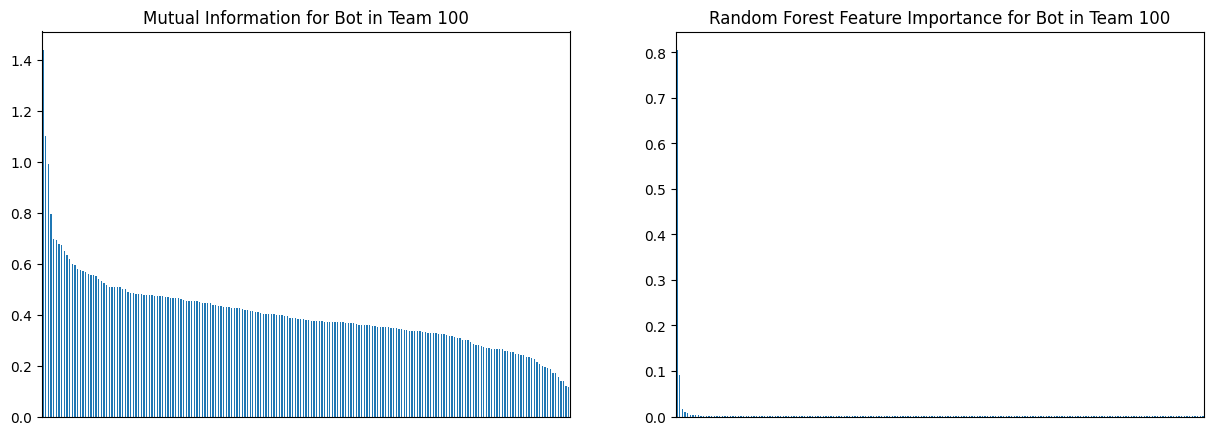

In [79]:
# Apply feature selection and random forest for each role
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor

# Apply feature selection and random forest for each role
roles = ['Top', 'Jungle', 'Mid', 'Bot']
teams = ['100', '200']  # Assuming teams are labeled as 100 and 200

role_mi_series = {}
role_feature_importances = {}

for role in roles:
    target_column = f'pos_x_{role}_100_1'

    role_features = [
        col for col in reshaped_data_lag_sorted.columns if target_column not in col]

    # Example target; adjust as needed
    y = reshaped_data_lag_sorted[target_column]

    # Prepare data
    X = reshaped_data_lag_sorted[role_features]

    # Drop NaN values
    y = y.dropna(axis=0)
    X.dropna(axis=0, inplace=True)
    X = X[X.index.isin(y.index)]
    y = y[y.index.isin(X.index)]

    # Compute mutual information
    mi = mutual_info_regression(X, y)
    mi_series = pd.Series(mi, index=X.columns)
    role_mi_series[role] = mi_series

    # Train Random Forest and compute feature importance
    rf = RandomForestRegressor(n_estimators=300, random_state=42)
    rf.fit(X, y)
    feature_importances = pd.Series(
        rf.feature_importances_, index=X.columns)
    role_feature_importances[role] = feature_importances

    # Display results
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    mi_series.sort_values(ascending=False).plot.bar(
        ax=ax[0], title=f'Mutual Information for {role} in Team 100')
    feature_importances.sort_values(ascending=False).plot.bar(
        ax=ax[1], title=f'Random Forest Feature Importance for {role} in Team 100')
    # Show x-axis sparingly
    for a in ax:
        a.set_xticks([])

    plt.show()

In [89]:
# Select important features based on mutual information and feature importance
correlation_threshold = 0.4
importance_treshold = 0.005
important_features = {}

for role in roles:
    mi_series = role_mi_series[role]
    feature_importances = role_feature_importances[role]
    # Select features based on mutual information and feature importance
    selected_features = mi_series[mi_series > correlation_threshold].index.intersection(
        feature_importances[feature_importances > importance_treshold].index).tolist()
    # Sort selected features based on importance
    selected_features = feature_importances[selected_features].sort_values(
        ascending=False).index.tolist()
    important_features[role] = selected_features

    print(f'Important features for {role}: {selected_features}')

Important features for Top: ['pos_x_Top_100_2', 'pos_z_Top_100_1', 'pos_x_Top_100_3', 'pos_z_Top_100_3', 'pos_z_Top_100_4', 'pos_z_Top_100_2', 'pos_x_Bot_100_1']
Important features for Jungle: ['pos_x_Jungle_100_2', 'pos_z_Jungle_100_1', 'pos_z_Bot_100_1']
Important features for Mid: ['pos_z_Mid_100_1', 'pos_x_Mid_100_2', 'pos_x_Top_100_1', 'pos_z_Mid_100_2']
Important features for Bot: ['pos_x_Bot_100_2', 'pos_z_Bot_100_1', 'pos_z_Mid_100_1', 'pos_z_Bot_200_1']
